### Dataset
In this homework, we will use the New York City Airbnb Open Data. You can take it from Kaggle or download from here if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

### EDA
Load the data.
Look at the price variable. Does it have a long tail?

### Features
For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'price',
* 'minimum_nights',
* 'number_of_reviews',
* 'reviews_per_month',
* 'calculated_host_listings_count',
* 'availability_365'

Select only them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
airbnb = pd.read_csv("AB_NYC_2019.csv") 
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df = airbnb[[
            'latitude',
            'longitude',
            'minimum_nights',
            'number_of_reviews',
            'reviews_per_month',
            'calculated_host_listings_count',
            'availability_365',
            'price']]

df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,40.64749,-73.97237,1,9,0.21,6,365,149
1,40.75362,-73.98377,1,45,0.38,2,355,225
2,40.80902,-73.94190,3,0,NaN,1,365,150
3,40.68514,-73.95976,1,270,4.64,1,194,89
4,40.79851,-73.94399,10,9,0.10,1,0,80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   minimum_nights                  48895 non-null  int64  
 3   number_of_reviews               48895 non-null  int64  
 4   reviews_per_month               38843 non-null  float64
 5   calculated_host_listings_count  48895 non-null  int64  
 6   availability_365                48895 non-null  int64  
 7   price                           48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [5]:
df.price.tail()

48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, dtype: int64

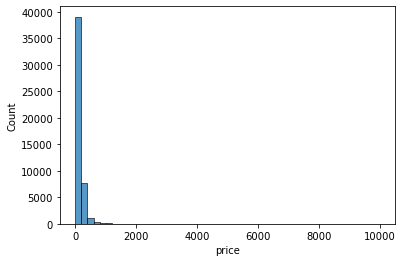

In [6]:
sns.histplot(df.price, bins=50)

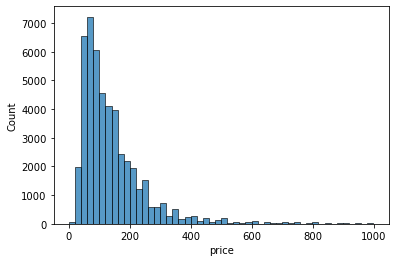

In [7]:
sns.histplot(df.price[df.price <1000],bins=50)

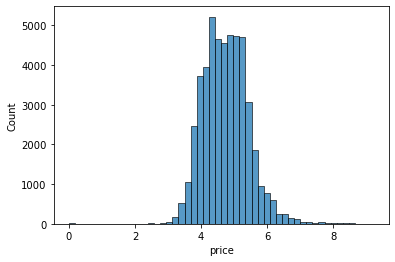

In [8]:
logpirce= np.log1p(df.price)

sns.histplot(logpirce,bins=50)


 # Q1 
 * reviews_per_month is the feature with 10_052 missing rows.

In [9]:
df.isna().sum()

latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

# **Q2**:
* the median( 50%) of minimum_nights is 3.0

In [10]:
df.minimum_nights.median()

3.0

In [11]:
df.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,1.373221,7.143982,112.781327,152.720687
std,0.054530,0.046157,20.510550,44.550582,1.680442,32.952519,131.622289,240.154170
min,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.690100,-73.983070,1.000000,1.000000,0.190000,1.000000,0.000000,69.000000
50%,40.723070,-73.955680,3.000000,5.000000,0.720000,1.000000,45.000000,106.000000
75%,40.763115,-73.936275,5.000000,24.000000,2.020000,2.000000,227.000000,175.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000,10000.000000


In [12]:
df.describe().T.style.bar(subset=['mean'], color='#FF595E')\
                           .background_gradient(subset=['50%'], cmap='PiYG') # highlight median

,count,mean,std,min,25%,50%,75%,max
latitude,48895.000000,40.728949,0.054530,40.499790,40.690100,40.723070,40.763115,40.913060
longitude,48895.000000,-73.952170,0.046157,-74.244420,-73.983070,-73.955680,-73.936275,-73.712990
minimum_nights,48895.000000,7.029962,20.510550,1.000000,1.000000,3.000000,5.000000,1250.000000
number_of_reviews,48895.000000,23.274466,44.550582,0.000000,1.000000,5.000000,24.000000,629.000000
reviews_per_month,38843.000000,1.373221,1.680442,0.010000,0.190000,0.720000,2.020000,58.500000
calculated_host_listings_count,48895.000000,7.143982,32.952519,1.000000,1.000000,1.000000,2.000000,327.000000
availability_365,48895.000000,112.781327,131.622289,0.000000,0.000000,45.000000,227.000000,365.000000
price,48895.000000,152.720687,240.154170,0.000000,69.000000,106.000000,175.000000,10000.000000


### Split the data

In [13]:
df.shape

(48895, 8)

In [14]:
df1 = df.copy() 

In [15]:
n = len(df)
n

48895

In [16]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)
n , n_val, n_test, n_train, (n_val+n_test+n_train)

(48895, 9779, 9779, 29337, 48895)

In [17]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [18]:
idx = np.arange(n)


In [19]:
np.random.seed(42)
np.random.shuffle(idx)


In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
879,40.64354,-73.97777,3,62,0.71,1,189,89
44383,40.70666,-73.90779,21,0,NaN,1,73,30
15394,40.76116,-73.99016,2,17,0.43,1,0,120
43230,40.70763,-74.01050,2,5,1.88,327,272,470
16332,40.79658,-73.93287,2,30,0.80,1,30,199
...,...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,2,0,NaN,1,0,95
14661,40.78638,-73.97004,30,10,0.40,1,0,101
24515,40.72716,-73.98524,3,75,3.12,1,60,100
31460,40.79578,-73.94523,2,31,2.10,1,265,68


In [21]:
len(df_train),len(df_val),len(df_test)

(29337, 9779, 9779)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [24]:
len(y_train),len(y_val),len(y_test)

(29337, 9779, 9779)

In [25]:
del df_train['price']
del df_val['price']
del df_test['price']

# Q3

In [26]:
df_train1 = df_train.copy()
df_train2 = df_train.copy()
df_train3 = df_train.copy()

In [27]:
# Functions 

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


base = [
            'latitude',
            'longitude',
            'minimum_nights',
            'number_of_reviews',
            'reviews_per_month',
            'calculated_host_listings_count',
            'availability_365'
]

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

## 1st Model with fill 0

In [28]:
print("na sum befor = ",df_train1.reviews_per_month.isna().sum())
df_train1.reviews_per_month = df_train1.reviews_per_month.fillna(0)
print("na sum after = ",df_train1.reviews_per_month.isna().sum())

na sum befor =  5998
na sum after =  0


In [29]:
X_train1 = df_train1.fillna(0).values

w0_1, w_1 = train_linear_regression(X_train1, y_train)

y_pred_1 = w0_1 + X_train1.dot(w_1)

In [30]:
w0_1, y_pred_1

(-419.91265817250303,
 array([4.7827747 , 4.45947456, 4.89702083, ..., 4.82048871, 4.86944871,
        4.61612559]))

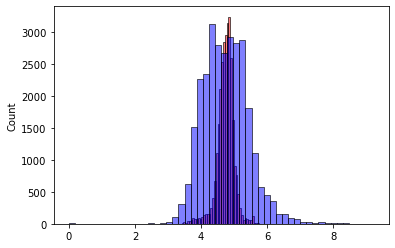

In [31]:
sns.histplot(y_pred_1, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [32]:
round(rmse(y_train, y_pred_1),2)

0.64

In [33]:
X_val = prepare_X(df_val)
y_pred_11 = w0_1 + X_val.dot(w_1)
round(rmse(y_val, y_pred_11),2)

0.64

## 2nd Model with fill with Mean

In [34]:
print("2nd Methode na sum befor = ",df_train2.reviews_per_month.isna().sum())
df_train2.reviews_per_month = df_train2.reviews_per_month.fillna(df_train2.reviews_per_month.mean())
print("2nd Methode na sum after = ",df_train2.reviews_per_month.isna().sum())

2nd Methode na sum befor =  5998
2nd Methode na sum after =  0


In [35]:
X_train2 = df_train2.fillna(df_train2.reviews_per_month.mean()).values

w0_2, w_2 = train_linear_regression(X_train2, y_train)

y_pred_2 = w0_2 + X_train2.dot(w_2)

In [36]:
w0_2, y_pred_2

(-423.53930772174533,
 array([4.76589611, 4.45581848, 4.89107725, ..., 4.83526871, 4.87768975,
        4.60682893]))

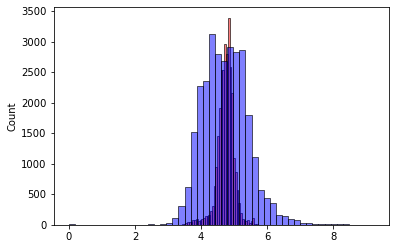

In [37]:
sns.histplot(y_pred_2, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [38]:
round(rmse(y_train, y_pred_2),2)

0.64

In [39]:
X_val = prepare_X(df_val)
y_pred_22 = w0_2 + X_val.dot(w_2)
round(rmse(y_val, y_pred_22),2)

0.64

**Observation** the RMSE is the Same 0.64

# Q4

# Regularization



In [40]:
df_train3.reviews_per_month = df_train3.reviews_per_month.fillna(0)
df_train3.isna().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [41]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

### Case r= 0

In [42]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.64

### Case r= 0.000001

In [43]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.000001
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.000001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.64

### Case r= 0.0001

In [44]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.0001
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.0001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.64

### Case r= 0.001

In [45]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.001
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.64

### Case r= 0.01

In [46]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.01
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.01)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.66

### Case r= 0.1

In [47]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.1
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.1)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.68

### Case r=  1

In [48]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 1
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=1)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.68

### Case r= 5

In [49]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 5
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=5)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.68

### Case r= 10

In [50]:
X_train3 = prepare_X(df_train3)

# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 10
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=10)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.68

**OR** this methode

In [51]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train3 = prepare_X(df_train3)
    w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=r)

    X_val_3 = prepare_X(df_val)
    y_pred_3 = w0_3 + X_val_3.dot(w_3)
    score = rmse(y_val, y_pred_3)
    
    print(r, w0_3, score)

0 -419.91265817250303 0.6430337788589233
1e-06 -419.86271538401513 0.643034115742464
0.0001 -414.9764921499109 0.6430723153620719
0.001 -375.2736523610076 0.6437669735353729
0.01 -191.7838404491127 0.6557528427517515
0.1 -32.56256054292286 0.6773299642459434
1 -3.4992168345626347 0.6823116950156575
5 -0.7033623163350434 0.6827915727845193
10 -0.35127676060936247 0.6828430212098543


 * the best r are : # r= 0.1, #  r= 1, #  r= 5, #  r= 10
 
 so  **r= 0.1** with **rmse = 0.68**

# Q5

In [52]:
rmse_scores =[]

### Seed = 0

In [53]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    # fillna with 0
    #df_train = df_train.fillna(0).values
    
    # train 
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # validate
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    
    # rmse
    score = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)
    rmse_scores.append(score)
    
    print('Seed=  {} , Rmse score = {}'.format(s,score))
    
    

Seed=  0 , Rmse score = 0.64
Seed=  1 , Rmse score = 0.64
Seed=  2 , Rmse score = 0.64
Seed=  3 , Rmse score = 0.64
Seed=  4 , Rmse score = 0.64
Seed=  5 , Rmse score = 0.66
Seed=  6 , Rmse score = 0.65
Seed=  7 , Rmse score = 0.64
Seed=  8 , Rmse score = 0.65
Seed=  9 , Rmse score = 0.65


In [54]:
rmse_scores

[0.64, 0.64, 0.64, 0.64, 0.64, 0.66, 0.65, 0.64, 0.65, 0.65]

In [55]:
std = np.std(rmse_scores)
print(' STD of RMSE Scores = {}'.format(round(std,3)))

 STD of RMSE Scores = 0.007


# Q6

In [56]:
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [57]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

In [58]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [61]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,2)

0.65

In [62]:
house = df_test.iloc[10].to_dict()
house

{'latitude': 40.733909999999995,
 'longitude': -73.97856999999999,
 'minimum_nights': 4.0,
 'number_of_reviews': 1.0,
 'reviews_per_month': 0.08,
 'calculated_host_listings_count': 1.0,
 'availability_365': 0.0,
 'price': 55.0}

In [63]:
df_small = pd.DataFrame([house])
df_small

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,40.73391,-73.97857,4.0,1.0,0.08,1.0,0.0,55.0


In [64]:
X_small = prepare_X(df_small)

y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

4.805964741551918

In [65]:
np.expm1(y_pred)

121.23736161665778

In [66]:
np.expm1(y_test[10])


55.00000000000002